In [42]:
# Thêm autoreload vào để tự động reload lại module nếu có thay đổi code trong module
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Các model scikit learn cho bài toán phân loại
from sklearn.svm import SVC # Support vector machine
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBClassifier
import json

import os, sys
sys.path.append(os.path.abspath(".."))
from utils.common import save_model

seed = 42
np.random.seed(seed)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Các thông tin về dữ liệu

In [43]:
train_df = pd.read_csv("train_clean.csv")

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   label             2000 non-null   object 
 1   nose_x            2000 non-null   float64
 2   nose_y            2000 non-null   float64
 3   nose_z            2000 non-null   float64
 4   left_shoulder_x   2000 non-null   float64
 5   left_shoulder_y   2000 non-null   float64
 6   left_shoulder_z   2000 non-null   float64
 7   right_shoulder_x  2000 non-null   float64
 8   right_shoulder_y  2000 non-null   float64
 9   right_shoulder_z  2000 non-null   float64
 10  left_elbow_x      2000 non-null   float64
 11  left_elbow_y      2000 non-null   float64
 12  left_elbow_z      2000 non-null   float64
 13  right_elbow_x     2000 non-null   float64
 14  right_elbow_y     2000 non-null   float64
 15  right_elbow_z     2000 non-null   float64
 16  left_wrist_x      2000 non-null   float64


In [45]:
train_df.columns

Index(['label', 'nose_x', 'nose_y', 'nose_z', 'left_shoulder_x',
       'left_shoulder_y', 'left_shoulder_z', 'right_shoulder_x',
       'right_shoulder_y', 'right_shoulder_z', 'left_elbow_x', 'left_elbow_y',
       'left_elbow_z', 'right_elbow_x', 'right_elbow_y', 'right_elbow_z',
       'left_wrist_x', 'left_wrist_y', 'left_wrist_z', 'right_wrist_x',
       'right_wrist_y', 'right_wrist_z', 'left_hip_x', 'left_hip_y',
       'left_hip_z', 'right_hip_x', 'right_hip_y', 'right_hip_z'],
      dtype='object')

In [46]:
train_df.head()

,label,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,...,left_wrist_z,right_wrist_x,right_wrist_y,right_wrist_z,left_hip_x,left_hip_y,left_hip_z,right_hip_x,right_hip_y,right_hip_z
0,D,-0.077498,-0.245992,-0.213935,0.053865,-0.181389,-0.490359,-0.054603,-0.172158,0.184589,...,-0.456299,-0.165992,-0.004362,0.181812,0.038241,0.002727,-0.193322,-0.038241,-0.002727,0.193108
1,D,-0.051650,-0.241617,-0.152938,0.067650,-0.179408,-0.501177,-0.025207,-0.173240,0.261126,...,-0.402769,-0.179553,-0.013445,0.271282,0.033703,0.001980,-0.222334,-0.033703,-0.001980,0.222096
2,D,0.049882,-0.231772,-0.150960,0.148950,-0.166329,-0.434079,0.050054,-0.166305,0.273191,...,-0.469815,-0.152957,-0.033370,0.226910,0.033277,0.002622,-0.216427,-0.033277,-0.002622,0.216075
3,D,-0.214978,-0.223159,-0.401661,-0.047702,-0.161192,-0.649423,-0.140907,-0.159427,0.021403,...,-0.511053,-0.165668,0.027528,0.047395,0.038898,0.000502,-0.183170,-0.038898,-0.000502,0.182962
4,D,-0.068130,-0.260574,-0.229759,0.071011,-0.195722,-0.585308,-0.015023,-0.189895,0.199076,...,-0.542117,-0.159523,-0.007345,0.211393,0.029807,0.001546,-0.233104,-0.029807,-0.001546,0.232567


### 2. Training model

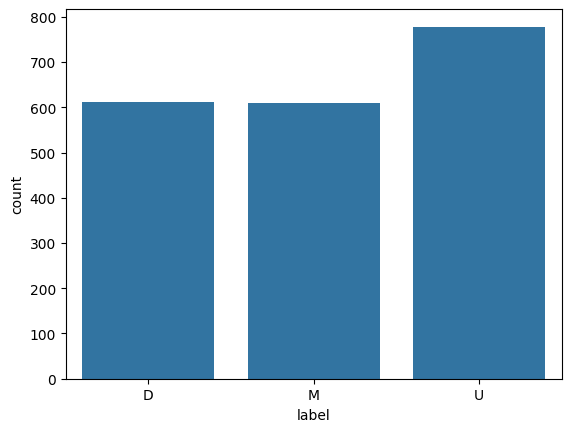

In [47]:
sns.countplot(x="label", data=train_df);

In [48]:
# Chuyển dữ liệu của label về dạng số
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# D: 0
# M: 1
# U: 2
train_df["label"] = label_encoder.fit_transform(train_df["label"])

In [49]:
# Extract features
X_train = train_df.drop(columns="label")
y_train = train_df["label"]

In [50]:
X_train.head()

,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,left_elbow_x,...,left_wrist_z,right_wrist_x,right_wrist_y,right_wrist_z,left_hip_x,left_hip_y,left_hip_z,right_hip_x,right_hip_y,right_hip_z
0,-0.077498,-0.245992,-0.213935,0.053865,-0.181389,-0.490359,-0.054603,-0.172158,0.184589,-0.030492,...,-0.456299,-0.165992,-0.004362,0.181812,0.038241,0.002727,-0.193322,-0.038241,-0.002727,0.193108
1,-0.051650,-0.241617,-0.152938,0.067650,-0.179408,-0.501177,-0.025207,-0.173240,0.261126,-0.019609,...,-0.402769,-0.179553,-0.013445,0.271282,0.033703,0.001980,-0.222334,-0.033703,-0.001980,0.222096
2,0.049882,-0.231772,-0.150960,0.148950,-0.166329,-0.434079,0.050054,-0.166305,0.273191,0.046886,...,-0.469815,-0.152957,-0.033370,0.226910,0.033277,0.002622,-0.216427,-0.033277,-0.002622,0.216075
3,-0.214978,-0.223159,-0.401661,-0.047702,-0.161192,-0.649423,-0.140907,-0.159427,0.021403,-0.040686,...,-0.511053,-0.165668,0.027528,0.047395,0.038898,0.000502,-0.183170,-0.038898,-0.000502,0.182962
4,-0.068130,-0.260574,-0.229759,0.071011,-0.195722,-0.585308,-0.015023,-0.189895,0.199076,-0.021647,...,-0.542117,-0.159523,-0.007345,0.211393,0.029807,0.001546,-0.233104,-0.029807,-0.001546,0.232567


In [51]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1995    2
1996    2
1997    2
1998    2
1999    2
Name: label, Length: 2000, dtype: int32

In [52]:
# Chuẩn hoá dữ liệu trên tập huấn luyện bằng z-scores
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [53]:
# X lúc này là một DataFrame mới với các cột mới được đánh số từ 0 đến n-1, trong đó n là số lượng cột trong dữ liệu ban đầu
X_train

array([[-0.73396602,  0.61698237,  0.38654644, ..., -2.33265993,
        -0.64749823,  0.92694453],
       [-0.4856829 ,  0.72709555,  0.96580156, ..., -1.9518156 ,
        -0.41781697,  1.0659056 ],
       [ 0.48956222,  0.97483691,  0.98457775, ..., -1.91609784,
        -0.61504925,  1.03704319],
       ...,
       [-0.69356819, -0.41427266,  0.14545985, ...,  1.66748868,
         0.83770492, -1.06218525],
       [-0.16029947, -0.74225237, -0.50484454, ...,  0.45299491,
         0.76490776, -1.16392522],
       [ 0.53550094, -0.80583038, -0.56988442, ...,  1.11842572,
         0.88849065, -1.12141943]])

In [54]:
import warnings
warnings.filterwarnings("ignore")

k_fold = KFold(n_splits=5, random_state=seed, shuffle=True)

In [55]:
def evaluate_model(name, model, results):
    # Đánh giá Model
    accuracy = cross_val_score(
        model, X_train, y_train, cv=k_fold, scoring="accuracy", n_jobs=-1, verbose=1
    ).mean()

    f1_score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring="f1_macro").mean()
    results.append((name, accuracy, f1_score))

In [56]:
algorithms = [
    ("LR", LogisticRegression(random_state=seed)),
    ("SVC", SVC(probability=True, random_state=seed)),
    ("KNN", KNeighborsClassifier()),
    ("DTC", DecisionTreeClassifier(random_state=seed)),
    ("RF", RandomForestClassifier(random_state=seed)),
    ("XGB", XGBClassifier(random_state=seed)),
]

models = {}
results_before_tunning = []

for name, model in algorithms:
    trained_model = model.fit(X_train, y_train)
    models[name] = trained_model
    evaluate_model(name, model, results_before_tunning)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [57]:
def print_results(results):
    results.sort(key=lambda el: el[2], reverse=True)

    return pd.DataFrame(
        results,
        columns=[
            "Model",
            "Accuracy score",
            "F1 score",
        ],
    )

print_results(results_before_tunning)

,Model,Accuracy score,F1 score
0,XGB,0.9430,0.940638
1,RF,0.9375,0.935102
2,SVC,0.9325,0.929720
3,LR,0.9290,0.926434
4,DTC,0.9140,0.910980
5,KNN,0.8955,0.889751


### Điều chỉnh siêu tham số cho các model

In [58]:
from sklearn.model_selection import RandomizedSearchCV

results_after_tuning = []

##### 1.1. Điều chỉnh siêu tham số cho Random Forest

In [18]:
random_forest = models["RF"]

  # Định nghĩa phạm vi của các siêu tham số cần tối ưu
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_features': ['log2', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Tạo RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid,
                                n_iter = 100, cv = k_fold, verbose=3, random_state=seed, n_jobs = -1)

# Tiến hành tìm kiếm siêu tham số
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=3)

In [19]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [21]:
json.dump(random_search.best_params_, open("./hyper_parameter/random_forest.json", "w"))

##### 1.2. Kiểm tra sự cải thiện của độ chính xác sau khi điều chỉnh siêu tham số cho Random Forest

In [59]:
with open('./hyper_parameter/random_forest.json', 'r') as f:
    best_params = json.load(f)
    best_params["bootstrap"] = bool(best_params["bootstrap"])

# Khởi tạo một mô hình Random Forest mới với các tham số tối ưu
best_random_forest_model = RandomForestClassifier(**best_params, random_state=seed, verbose=1)
best_random_forest_model.fit(X_train, y_train)

# Huấn luyện mô hình mới với dữ liệu huấn luyện của bạn
result = []
evaluate_model("RF", best_random_forest_model, result)
results_after_tuning.append(result[0])
print_results(result)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks    

,Model,Accuracy score,F1 score
0,RF,0.9415,0.938898


##### 2.1. Điều chỉnh siêu tham số cho SVC

In [23]:
from sklearn.model_selection import GridSearchCV

svc_model = models["SVC"]

param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1],
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
}

# Tạo GridSearchCV instance
svc_best_model = GridSearchCV(svc_model, param_grid, cv=5, verbose=3, n_jobs=-1)

# Tiến hành tinh chỉnh siêu tham số trên mô hình đã huấn luyện
svc_best_model.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất được tìm thấy
print("Best Parameters:", svc_best_model.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


In [24]:
json.dump(svc_best_model.best_params_, open("./hyper_parameter/SVC.json", "w"))

##### Kiểm tra sự cải thiện của độ chính xác sau khi điều chỉnh siêu tham số cho SVC

In [60]:
best_params = json.load(open("./hyper_parameter/SVC.json", "r"))
svc_best_model = SVC(**best_params, random_state=seed)
svc_best_model.fit(X_train, y_train)

SVC(C=1, gamma=0.001, kernel='linear', random_state=42)

In [61]:
results = []
evaluate_model("SVC", svc_best_model, results)
results_after_tuning.append(results[0])
print_results(results)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


,Model,Accuracy score,F1 score
0,SVC,0.931,0.928762


In [27]:
# save_model(svc_best_model, "./best_models/SVC_model.pkl")

##### 3.1. Điều chỉnh siêu tham số cho XGBoost

In [ ]:
import xgboost as xgb
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'objective': ['binary:logistic']  # Thêm tham số objective
}

# Khởi tạo mô hình XGBoost
xgb_model = xgb.XGBClassifier()

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)
grid_search.fit(X_train, y_train)

# Kết quả tốt nhất
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
print("Best accuracy found: ", grid_search.best_score_)

In [62]:
best_params = json.load(open("./hyper_parameter/xgboost.json", "r"))
xgb_model = XGBClassifier(**best_params, random_state=seed)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [63]:
results = []
evaluate_model("XGB", xgb_model, results)
results_after_tuning.append(results[0])
print_results(results)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


,Model,Accuracy score,F1 score
0,XGB,0.945,0.942783


##### 4.1. Điều chỉnh siêu tham số cho các thuật toán còn lại

In [23]:
best_params_random_other = {}
models_tuned_random_other = {}

# Adjust your algorithms list to use descriptive names that match param_grid
algorithms = [
    ("LR", LogisticRegression(random_state=seed)),
    ("KNN", KNeighborsClassifier()),
    ("DTC", DecisionTreeClassifier(random_state=seed)),
]

# Define parameter grid with correct keys
param_grid = {
    "LR": {
        "C": np.logspace(-4, 4, 20),  # More granular range for C
        "solver": ["liblinear", "lbfgs", "saga", "newton-cg"],  # Added 'newton-cg'
        "penalty": [
            "l1",
            "l2",
            "elasticnet",
            "none",
        ],  # Different norms for regularization
        "class_weight": ["balanced"],  # Added class_weight
    },
    "DTC": {
        "max_depth": [None, 3, 5, 10, 15, 20, 30, 50, 100],  # Expanded range
        "min_samples_split": [2, 5, 10, 20, 40, 100],  # More options
        "min_samples_leaf": [1, 2, 5, 10, 20],  # Added min_samples_leaf
        "class_weight": ["balanced"],
    },
    "KNN": {
        "n_neighbors": list(range(1, 21)),  # More neighbors
        "weights": ["uniform", "distance"],  # Existing weights
        "metric": [
            "euclidean",
            "manhattan",
            "chebyshev",
            "minkowski",
        ], 
    },
}


# Randomized Search application with check for parameter grid existence
for name, model in algorithms:
    print("Model processing: ", name)
    if name in param_grid:
        randomized_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid[name],
            n_iter=100,  # You can adjust the number of iterations
            cv=k_fold,
            scoring="accuracy",
            random_state=seed,
            n_jobs=-1,
            verbose=1,
        )
        randomized_search.fit(X_train, y_train)
        best_params_random_other[name] = randomized_search.best_params_
        models_tuned_random_other[name] = randomized_search.best_estimator_
    else:
        print(f"No parameter grid defined for {name}")

Model processing:  LR
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Model processing:  KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Model processing:  DTC
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [24]:
with open("hyper_parameter/other_algorithms.json", "w") as f:
    json.dump(best_params_random_other, f)

In [25]:
with open("hyper_parameter/other_algorithms.json", "r") as f:
    best_params = json.load(f)

# Assuming 'best_params' has been filled with the best parameters for each model from GridSearchCV or RandomizedSearchCV
algorithms = [
    ("LR", LogisticRegression(**best_params.get("LR", {}), random_state=seed)),
    ("KNN", KNeighborsClassifier(**best_params.get("KNN", {}))),
    ("DTC", DecisionTreeClassifier(**best_params.get("DTC", {}), random_state=seed)),
]

for name, model in algorithms:
    result = [] 
    evaluate_model(name, model, result)
    results_after_tuning.append(result[0])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


#### Kết quả trước và sau khi điều chỉnh siêu tham số

In [26]:
print_results(results_before_tunning)

,Model,Accuracy score,F1 score
0,XGB,0.9430,0.940638
1,RF,0.9375,0.935102
2,SVC,0.9325,0.929720
3,LR,0.9290,0.926434
4,DTC,0.9140,0.910980
5,KNN,0.8955,0.889751


In [27]:
print_results(results_after_tuning)

,Model,Accuracy score,F1 score
0,XGB,0.9450,0.942783
1,RF,0.9415,0.938898
2,LR,0.9370,0.934766
3,SVC,0.9310,0.928762
4,DTC,0.9300,0.927827
5,KNN,0.9155,0.910770


#### So sánh về thời gian chạy của XGBoost và Random Forest

In [29]:
import time

In [33]:
best_params_RF = json.load(open("./hyper_parameter/random_forest.json", "r"))
RF_model = RandomForestClassifier(**best_params_RF, random_state=seed, verbose=1)

best_params_XGB = json.load(open("./hyper_parameter/xgboost.json", "r"))
xgb_model = XGBClassifier(**best_params_XGB, random_state=seed)

start_time = time.time()
xgb_model.fit(X_train, y_train)
xgb_prediction_time = time.time() - start_time

start_time = time.time()
RF_model.fit(X_train, y_train)
rf_prediction_time = time.time() - start_time

print("XGB prediction time: ", xgb_prediction_time)
print("RF prediction time: ", rf_prediction_time)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.8s


XGB prediction time:  0.2142932415008545
RF prediction time:  2.879106044769287


#### Nhận xét

!!!! Như vậy XGBoost vừa cho kết quả tốt nhất về độ chính xác, vừa nhanh hơn so với Random Forest. Do đó chúng ta sẽ chọn XGBoost làm model cuối cùng để dự đoán.

### Confusion matrix:

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_predict

In [37]:
with open('./hyper_parameter/xgboost.json', 'r') as f:
    best_params = json.load(f)

xgb_model = XGBClassifier(**best_params, random_state=seed)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [38]:
y_pred = xgb_model.predict(X_train)
cm_full_train = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
cm_full_train, accuracy

(array([[612,   0,   0],
        [  0, 610,   0],
        [  0,   0, 778]], dtype=int64),
 1.0)

In [39]:
accuracy = cross_val_score(xgb_model, X_train, y_train, cv=k_fold, scoring="accuracy").mean()
y_pred = cross_val_predict(xgb_model, X_train, y_train, cv=k_fold)
cm_cross_val = confusion_matrix(y_train, y_pred)
accuracy, cm_cross_val

(0.945,
 array([[587,  25,   0],
        [ 24, 551,  35],
        [  1,  25, 752]], dtype=int64))

<Axes: >

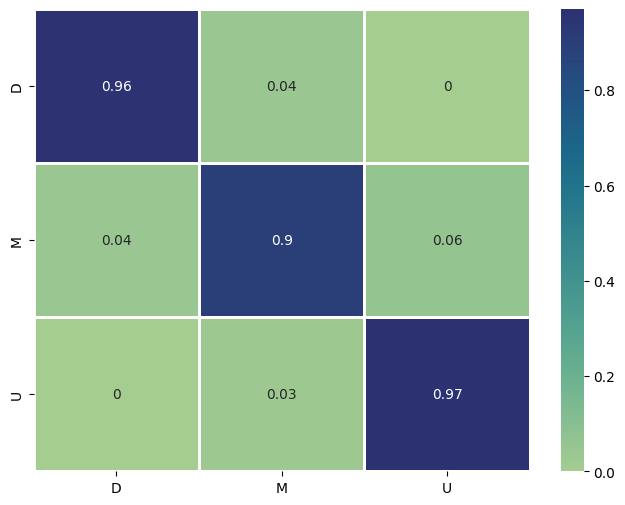

In [40]:
label_counts = np.sum(cm_cross_val, axis=1)
cm_cross_val = cm_cross_val / label_counts[:, None]
cm_cross_val = np.round(cm_cross_val, 2)
confusion_matrix_df = pd.DataFrame(cm_cross_val, index=["D", "M", "U"], columns=["D", "M", "U"])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, linewidths=1, annot=True, ax=ax, fmt="g", cmap="crest")

#### Lưu lại model

In [70]:
save_model(scaler, "./best_models/input_scaler.pkl")
save_model(xgb_model, "./best_models/XGB.pkl")